## Produção Etanol

In [ ]:
import pandas as pd

In [ ]:
# Fonte: https://unicadata.com.br/ => Área e produção => Dados Histórico de moagem e produção
producaoEtanol = pd.read_excel("producaoEtanol.xlsx", sheet_name="TB_01")

In [ ]:
producaoEtanol.head(10)

,SAFRA,ESTADO,MATÉRIA-PRIMA,MOAGEM,AÇÚCAR,ETANOL ANIDRO,ETANOL HIDRATADO,ETANOL TOTAL
0,2023/2024,ALAGOAS,CANA-DE-AÇÚCAR,21364445.0,1629251.0,255633.0,271072,526705
1,2023/2024,AMAZONAS,CANA-DE-AÇÚCAR,300768.0,20411.0,NaN,6805,6805
2,2023/2024,BAHIA,CANA-DE-AÇÚCAR,5739274.0,145326.0,144961.0,235350,380311
3,2023/2024,ESPÍRITO SANTO,CANA-DE-AÇÚCAR,2815552.0,157959.0,80344.0,26634,106978
4,2023/2024,GOIÁS,CANA-DE-AÇÚCAR,76620930.0,2718890.0,1263446.0,3527458,4790904
5,2023/2024,GOIÁS,MILHO,NaN,NaN,218632.0,505927,724559
6,2023/2024,MARANHÃO,CANA-DE-AÇÚCAR,2078230.0,19464.0,136972.0,23698,160670
7,2023/2024,MATO GROSSO,CANA-DE-AÇÚCAR,17674836.0,537753.0,378670.0,798862,1177532
8,2023/2024,MATO GROSSO,MILHO,NaN,NaN,1575249.0,2936161,4511410
9,2023/2024,MATO GROSSO DO SUL,CANA-DE-AÇÚCAR,52381929.0,2264901.0,749373.0,2166341,2915714


In [ ]:
producaoEtanol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SAFRA             533 non-null    object 
 1   ESTADO            533 non-null    object 
 2   MATÉRIA-PRIMA     533 non-null    object 
 3   MOAGEM            503 non-null    float64
 4   AÇÚCAR            428 non-null    float64
 5   ETANOL ANIDRO     440 non-null    float64
 6   ETANOL HIDRATADO  533 non-null    int64  
 7   ETANOL TOTAL      533 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 33.4+ KB


In [ ]:
producaoEtanol['Ano'] = producaoEtanol['SAFRA'].str[:4].astype(int)

In [ ]:
colunas_Eliminar = ['SAFRA', 'ESTADO', 'MATÉRIA-PRIMA']
producaoEtanol.drop(columns=colunas_Eliminar, inplace=True)

In [ ]:
# convertendo colunas no tipo int e valores nulos em 0
colunas_para_int = ["MOAGEM","AÇÚCAR", "ETANOL ANIDRO", "ETANOL HIDRATADO"]
producaoEtanol[colunas_para_int] = producaoEtanol[colunas_para_int].fillna(0)
producaoEtanol[colunas_para_int] = producaoEtanol[colunas_para_int].astype(int)

In [ ]:
# agrupando estados para produção nacional
producaoEtanol = producaoEtanol.groupby('Ano', as_index=False).sum()

In [ ]:
producaoEtanol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Ano               24 non-null     int64
 1   MOAGEM            24 non-null     int64
 2   AÇÚCAR            24 non-null     int64
 3   ETANOL ANIDRO     24 non-null     int64
 4   ETANOL HIDRATADO  24 non-null     int64
 5   ETANOL TOTAL      24 non-null     int64
dtypes: int64(6)
memory usage: 1.3 KB


In [ ]:
producaoEtanol.head(10)

,Ano,MOAGEM,AÇÚCAR,ETANOL ANIDRO,ETANOL HIDRATADO,ETANOL TOTAL
0,2000,257622017,16256105,5620964,4972071,10593035
1,2001,293050543,19218011,6465098,5070936,11536034
2,2002,320650076,22567260,7015466,5607759,12623225
3,2003,358939690,24925793,8911957,5883679,14795636
4,2004,386090118,26621215,8304450,7112218,15416668
5,2005,387345224,25948223,7826628,8116313,15942941
6,2006,425415606,29798433,8292451,9418036,17710487
7,2007,492381586,30719385,8362882,14059124,22422006
8,2008,569215975,31047382,9336343,18189621,27525964
9,2009,602193192,32956359,7065247,18625671,25690918


## Preço do Açucar

In [ ]:
import pandas as pd

In [ ]:
# Fonte: https://www.cepea.org.br/br/indicador/acucar.aspx  => Série de preços
cotacao_acucar = pd.read_excel("CEPEA_20250914090829.xls", sheet_name="Plan 1")

In [ ]:
cotacao_acucar.head(10)

,INDICADOR DO AÇÚCAR CRISTAL BRANCO CEPEA/ESALQ - SÃO PAULO,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Fonte: Cepea,NaN,NaN
2,Data,À vista R$,À vista US$
3,20/05/2003,29.65,9.75
4,21/05/2003,29.26,9.75
5,22/05/2003,28.81,9.66
6,23/05/2003,28.35,9.71
7,26/05/2003,27.83,9.19
8,27/05/2003,27.76,9.16
9,28/05/2003,27.48,9.12


In [ ]:
# transformando a linha 2 no cabeçalho
cotacao_acucar.columns = cotacao_acucar.iloc[2]
cotacao_acucar = cotacao_acucar[3:].reset_index(drop=True)

In [ ]:
cotacao_acucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5538 entries, 0 to 5537
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         5538 non-null   object
 1   À vista R$   5538 non-null   object
 2   À vista US$  5538 non-null   object
dtypes: object(3)
memory usage: 129.9+ KB


In [ ]:
cotacao_acucar.drop(columns=['À vista US$'], inplace=True)

In [ ]:
cotacao_acucar["Data"] = pd.to_datetime(cotacao_acucar["Data"], format="%d/%m/%Y")
cotacao_acucar["À vista R$"] = cotacao_acucar["À vista R$"].astype(float)

In [ ]:
cotacao_acucar['Ano'] = pd.to_datetime(cotacao_acucar['Data']).dt.year
# cotacao_acucar['Mes'] = pd.to_datetime(cotacao_acucar['Data']).dt.month
cotacao_media_acucar = cotacao_acucar.groupby('Ano')['À vista R$'].mean().reset_index()

In [ ]:
cotacao_media_acucar.rename(columns={"À vista R$": "Preço médio R$"}, inplace=True)
cotacao_media_acucar['Preço médio R$'] = cotacao_media_acucar['Preço médio R$'].round(2)

In [ ]:
cotacao_media_acucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             23 non-null     int32  
 1   Preço médio R$  23 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 408.0 bytes


In [ ]:
cotacao_media_acucar.head(10)

,Ano,Preço médio R$
0,2003,23.93
1,2004,26.04
2,2005,31.32
3,2006,45.30
4,2007,28.30
5,2008,28.38
6,2009,48.24
7,2010,60.44
8,2011,65.75
9,2012,54.90


## Preço dos Combustíveis no Brasil

In [81]:
import pandas as pd

In [82]:
estados = pd.read_excel('/content/semanal-brasil-2004-a-2012.xlsx')

In [83]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 16 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP  2243 non-null   object
 1   Unnamed: 1                                                         2236 non-null   object
 2   Unnamed: 2                                                         2236 non-null   object
 3   Unnamed: 3                                                         2236 non-null   object
 4   Unnamed: 4                                                         2236 non-null   object
 5   Unnamed: 5                                                         2236 non-null   object
 6   Unnamed: 6                                                         2236 non-null   object
 7   Unnamed: 7                       

In [84]:
informacoes_tabela = estados['AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP'].head(12)

In [85]:
informacoes_tabela

,"AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP"
0,COORDENADORIA DE DEFESA DA CONCORRÊNCIA
1,SISTEMA DE LEVANTAMENTO DE PREÇOS
2,NaN
3,RELATÓRIO DE DEFESA DA CONCORRÊNCIA
4,NaN
5,INTERVALO DE TEMPO: SEMANAL
6,PERÍODO: 09/05/2004 A 29/12/2012
7,COMBUSTÍVEL: TODOS
8,TIPO RELATÓRIO: BRASIL
9,NaN


In [86]:
estados_atualizados = estados.copy()


In [87]:
estados_atualizados.drop(columns=['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'], inplace=True)


In [88]:
estados_atualizados.drop(labels=range(0,12), axis=0, inplace=True)

In [89]:
estados_atualizados

,"AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
12,2004-05-09 00:00:00,2004-05-15 00:00:00,ETANOL HIDRATADO,11472,R$/l,1.283,0.268,0.59,2.4,0.38,0.209
13,2004-05-16 00:00:00,2004-05-22 00:00:00,ETANOL HIDRATADO,11544,R$/l,1.279,0.268,0.59,2.4,0.376,0.21
14,2004-05-23 00:00:00,2004-05-29 00:00:00,ETANOL HIDRATADO,11566,R$/l,1.288,0.24,0.62,2.4,0.381,0.186
15,2004-05-30 00:00:00,2004-06-05 00:00:00,ETANOL HIDRATADO,11559,R$/l,1.323,0.226,0.639,2.4,0.389,0.171
16,2004-06-06 00:00:00,2004-06-12 00:00:00,ETANOL HIDRATADO,11554,R$/l,1.34,0.23,0.669,2.4,0.379,0.172
...,...,...,...,...,...,...,...,...,...,...,...
2242,2012-11-25 00:00:00,2012-12-01 00:00:00,ÓLEO DIESEL,7071,R$/l,2.15,0.111,1.844,2.95,0.222,0.052
2243,2012-12-02 00:00:00,2012-12-08 00:00:00,ÓLEO DIESEL,7101,R$/l,2.151,0.112,1.869,2.95,0.224,0.052
2244,2012-12-09 00:00:00,2012-12-15 00:00:00,ÓLEO DIESEL,7049,R$/l,2.149,0.112,1.869,2.95,0.222,0.052
2245,2012-12-16 00:00:00,2012-12-22 00:00:00,ÓLEO DIESEL,7103,R$/l,2.152,0.113,1.869,2.95,0.224,0.053


In [90]:
Colunas_nomes_novos = ['Data','Data1','Região','UF','Produto','Tamanho da Amostra','Unidade de Medida','Valor de Venda','desvio padrão','valor mínimo','valor máximo']

In [91]:
estados_atualizados.columns = Colunas_nomes_novos

In [92]:
estados_atualizados.drop(columns=['Data1'], inplace=True)

In [93]:
estados_atualizados['Data'] =estados_atualizados['Data'].astype(str).str.replace(' 00:00:00', '')

In [94]:
estados_atualizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 12 to 2246
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data                2235 non-null   object
 1   Região              2235 non-null   object
 2   UF                  2235 non-null   object
 3   Produto             2235 non-null   object
 4   Tamanho da Amostra  2235 non-null   object
 5   Unidade de Medida   2235 non-null   object
 6   Valor de Venda      2235 non-null   object
 7   desvio padrão       2235 non-null   object
 8   valor mínimo        2235 non-null   object
 9   valor máximo        2235 non-null   object
dtypes: object(10)
memory usage: 174.7+ KB


In [95]:
estados_atualizados = estados_atualizados.reset_index(drop=True)


In [102]:
estados_atualizados['Tamanho da Amostra'] = estados_atualizados['Tamanho da Amostra'].astype(float)

In [96]:
dados_float = ['Valor de Venda','desvio padrão','valor mínimo','valor máximo','Tamanho da Amostra']
estados_atualizados[dados_float] = estados_atualizados[dados_float].astype(float)

In [97]:
dados_string = ['Região','UF','Produto','Tamanho da Amostra','Unidade de Medida']
estados_atualizados[dados_string] = estados_atualizados[dados_string].astype(str)

In [99]:
estados_atualizados['Data'] = pd.to_datetime(estados_atualizados['Data'])

In [103]:
estados_atualizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                2235 non-null   datetime64[ns]
 1   Região              2235 non-null   object        
 2   UF                  2235 non-null   object        
 3   Produto             2235 non-null   object        
 4   Tamanho da Amostra  2235 non-null   float64       
 5   Unidade de Medida   2235 non-null   object        
 6   Valor de Venda      2235 non-null   float64       
 7   desvio padrão       2235 non-null   float64       
 8   valor mínimo        2235 non-null   float64       
 9   valor máximo        2235 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 174.7+ KB


In [104]:
estados_atualizados

,Data,Região,UF,Produto,Tamanho da Amostra,Unidade de Medida,Valor de Venda,desvio padrão,valor mínimo,valor máximo
0,2004-05-09,ETANOL HIDRATADO,11472,R$/l,1.283,0.268,0.590,2.40,0.380,0.209
1,2004-05-16,ETANOL HIDRATADO,11544,R$/l,1.279,0.268,0.590,2.40,0.376,0.210
2,2004-05-23,ETANOL HIDRATADO,11566,R$/l,1.288,0.24,0.620,2.40,0.381,0.186
3,2004-05-30,ETANOL HIDRATADO,11559,R$/l,1.323,0.226,0.639,2.40,0.389,0.171
4,2004-06-06,ETANOL HIDRATADO,11554,R$/l,1.340,0.23,0.669,2.40,0.379,0.172
...,...,...,...,...,...,...,...,...,...,...
2230,2012-11-25,ÓLEO DIESEL,7071,R$/l,2.150,0.111,1.844,2.95,0.222,0.052
2231,2012-12-02,ÓLEO DIESEL,7101,R$/l,2.151,0.112,1.869,2.95,0.224,0.052
2232,2012-12-09,ÓLEO DIESEL,7049,R$/l,2.149,0.112,1.869,2.95,0.222,0.052
2233,2012-12-16,ÓLEO DIESEL,7103,R$/l,2.152,0.113,1.869,2.95,0.224,0.053


In [105]:
estados_2 = pd.read_excel('/content/semanal-brasil-desde-2013 (1).xlsx')

In [106]:
estados_2.columns

Index(['AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [107]:
estados_2[10:30]

,"AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
10,"Entre 30/7/17 e 30/12/17, a abrangência geográ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Em razão da alternância de municípios pesquisa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,"Entre 27/5/18 e 2/6/18, o quantitativo de reve...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Não houve pesquisa de preços entre 18/8/20 e 1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"A partir de 08/05/22, os preços por litro de t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,"Atualmente, o produto 'óleo diesel' se refere ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,DATA INICIAL,DATA FINAL,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
17,2012-12-30 00:00:00,2013-01-05 00:00:00,ETANOL HIDRATADO,8173,R$/l,1.948,0.244,1.479,3,0.262,0.125,1.686,0.219,1.2995,2.3632,0.13
18,2012-12-30 00:00:00,2013-01-05 00:00:00,GASOLINA COMUM,8672,R$/l,2.758,0.147,2.269,3.799,0.385,0.053,2.373,0.11,2.12,2.89,0.046
19,2012-12-30 00:00:00,2013-01-05 00:00:00,GLP,8052,R$/13Kg,40.113,4.017,26,62,10.362,0.1,29.751,4.514,16.14,45,0.152


In [108]:
# transformando a linha 16 no cabeçalho
estados_2.columns = estados_2.iloc[16]

In [109]:
estados_2

16,DATA INICIAL,DATA FINAL,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,SUPERINTENDÊNCIA DE DEFESA DA CONCORRÊNCIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SISTEMA DE LEVANTAMENTO DE PREÇOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RELATÓRIO DE DEFESA DA CONCORRÊNCIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4191,2025-09-07 00:00:00,2025-09-13 00:00:00,GASOLINA COMUM,3644,R$/l,6.17,0.427,5.19,9.19,-,0.069,-,-,-,-,-
4192,2025-09-07 00:00:00,2025-09-13 00:00:00,GLP,1833,R$/13kg,107.82,12.293,79.99,156,-,0.114,-,-,-,-,-
4193,2025-09-07 00:00:00,2025-09-13 00:00:00,GNV,342,R$/m³,4.51,0.407,3.97,6.28,-,0.09,-,-,-,-,-
4194,2025-09-07 00:00:00,2025-09-13 00:00:00,OLEO DIESEL,1370,R$/l,5.99,0.391,5.39,8.33,-,0.065,-,-,-,-,-


In [110]:
estados_2.drop(labels=range(0,17), axis=0, inplace=True)

In [111]:
estados_2.reset_index(drop=True, inplace=True)

In [112]:
estados_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DATA INICIAL                   4179 non-null   object
 1   DATA FINAL                     4179 non-null   object
 2   PRODUTO                        4179 non-null   object
 3   NÚMERO DE POSTOS PESQUISADOS   4179 non-null   object
 4   UNIDADE DE MEDIDA              4179 non-null   object
 5   PREÇO MÉDIO REVENDA            4179 non-null   object
 6   DESVIO PADRÃO REVENDA          4179 non-null   object
 7   PREÇO MÍNIMO REVENDA           4179 non-null   object
 8   PREÇO MÁXIMO REVENDA           4179 non-null   object
 9   MARGEM MÉDIA REVENDA           4179 non-null   object
 10  COEF DE VARIAÇÃO REVENDA       4179 non-null   object
 11  PREÇO MÉDIO DISTRIBUIÇÃO       4179 non-null   object
 12  DESVIO PADRÃO DISTRIBUIÇÃO     4179 non-null   object
 13  PRE

In [113]:
estados_2.drop(columns=['DATA FINAL'], inplace=True)

In [114]:
estados_2.rename(columns={'DATA INICIAL': 'DATA'}, inplace=True)

In [115]:
estados_2['DATA'] =estados_2['DATA'].astype(str).str.replace(' 00:00:00', '')


In [116]:
estados_2['DATA'] = pd.to_datetime(estados_2['DATA'])


In [117]:
estados_2.drop(columns=[  'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'], inplace=True)

In [118]:
estados_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATA                          4179 non-null   datetime64[ns]
 1   PRODUTO                       4179 non-null   object        
 2   NÚMERO DE POSTOS PESQUISADOS  4179 non-null   object        
 3   UNIDADE DE MEDIDA             4179 non-null   object        
 4   PREÇO MÉDIO REVENDA           4179 non-null   object        
 5   DESVIO PADRÃO REVENDA         4179 non-null   object        
 6   PREÇO MÍNIMO REVENDA          4179 non-null   object        
 7   PREÇO MÁXIMO REVENDA          4179 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 261.3+ KB


In [119]:
estados_2_float = ['PREÇO MÉDIO REVENDA','DESVIO PADRÃO REVENDA','PREÇO MÍNIMO REVENDA','PREÇO MÁXIMO REVENDA']
estados_2[estados_2_float] = estados_2[estados_2_float].astype(float)
#

In [120]:
estados_2['NÚMERO DE POSTOS PESQUISADOS'] = estados_2['NÚMERO DE POSTOS PESQUISADOS'].astype(int)


In [122]:
estados_atualizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                2235 non-null   datetime64[ns]
 1   Região              2235 non-null   object        
 2   UF                  2235 non-null   object        
 3   Produto             2235 non-null   object        
 4   Tamanho da Amostra  2235 non-null   float64       
 5   Unidade de Medida   2235 non-null   object        
 6   Valor de Venda      2235 non-null   float64       
 7   desvio padrão       2235 non-null   float64       
 8   valor mínimo        2235 non-null   float64       
 9   valor máximo        2235 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 174.7+ KB


In [123]:
# juntando os dois dataframes
dados_combustiveis = pd.concat([estados_atualizados, estados_2], ignore_index=True)

In [124]:
dados_combustiveis.head(10)

,Data,Região,UF,Produto,Tamanho da Amostra,Unidade de Medida,Valor de Venda,desvio padrão,valor mínimo,valor máximo,DATA,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA
0,2004-05-09,ETANOL HIDRATADO,11472,R$/l,1.283,0.268,0.590,2.40,0.380,0.209,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-05-16,ETANOL HIDRATADO,11544,R$/l,1.279,0.268,0.590,2.40,0.376,0.210,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-05-23,ETANOL HIDRATADO,11566,R$/l,1.288,0.24,0.620,2.40,0.381,0.186,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-05-30,ETANOL HIDRATADO,11559,R$/l,1.323,0.226,0.639,2.40,0.389,0.171,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-06-06,ETANOL HIDRATADO,11554,R$/l,1.340,0.23,0.669,2.40,0.379,0.172,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2004-06-13,ETANOL HIDRATADO,11565,R$/l,1.354,0.236,0.739,2.40,0.377,0.174,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2004-06-20,ETANOL HIDRATADO,11550,R$/l,1.384,0.244,0.699,2.40,0.391,0.176,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2004-06-27,ETANOL HIDRATADO,11527,R$/l,1.381,0.247,0.729,2.40,0.382,0.179,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2004-07-04,ETANOL HIDRATADO,11583,R$/l,1.380,0.244,0.739,2.40,0.372,0.177,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2004-07-11,ETANOL HIDRATADO,11570,R$/l,1.374,0.242,0.699,2.32,0.363,0.176,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados_combustiveis.to_csv('dados_combustiveis.csv', index=False)

## Carga Tributária

In [125]:
# tributos

anos = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
carga_tributaria_federal = [20.4,21.2,20.7,20.4,19.6,19.7,19.8,19.7,20,19.8,18.6,19.9,20.6,19.9,21.4]
carga_tributaria_estadual = [8.2,8.1,8.1,8.2,8.0,8.1,8.1,8.3,8.4,8.5,8.4,8.8,8.5,8.1,8.5]
carga_tributaria_municipal = [1.7,1.7,1.8,1.8,1.8,1.9,1.9,1.9,2,2.2,2.1,2.2,2.2,2.3,2.4]
receita_tributaria_total = [carga_tributaria_federal[i] + carga_tributaria_estadual[i] + carga_tributaria_municipal[i] for i in range(len(carga_tributaria_federal))]

print(len(carga_tributaria_federal))
print(len(carga_tributaria_estadual))
print(len(carga_tributaria_municipal))


#  Fonte: https://www.gov.br/fazenda/pt-br/assuntos/noticias/2025/marco/carga-tributaria-bruta-do-governo-geral-atingiu-32-32-do-pib-em-2024-mostra-boletim-do-tesouro

15
15
15


In [126]:
carga_tributaria_df = pd.DataFrame({
    'Anos':anos,
    'Carga Tributária Federal': carga_tributaria_federal,
    'Carga Tributária Estadual': carga_tributaria_estadual,
    'Carga Tributária Municipal': carga_tributaria_municipal,
    'Receita Tributária Total': receita_tributaria_total
})


In [127]:
carga_tributaria_df[['Carga Tributária Estadual','Carga Tributária Municipal','Carga Tributária Federal','Receita Tributária Total']].describe()

,Carga Tributária Estadual,Carga Tributária Municipal,Carga Tributária Federal,Receita Tributária Total
count,15.000000,15.000000,15.000000,15.000000
mean,8.286667,1.993333,20.113333,30.393333
std,0.223180,0.225093,0.695770,0.796839
min,8.000000,1.700000,18.600000,29.100000
25%,8.100000,1.800000,19.750000,29.850000
50%,8.200000,1.900000,19.900000,30.400000
75%,8.450000,2.200000,20.500000,30.750000
max,8.800000,2.400000,21.400000,32.300000


## Produção de Petroleo



In [ ]:
import pandas as pd

In [ ]:
# Fonte: https://dados.gov.br/dados/conjuntos-dados/producao-de-petroleo-e-gas-natural-por-estado-e-localizacao => Dados - Produção de petróleo (metros cúbicos) 1997-2025
producaoPetroleo = pd.read_csv('producao-petroleo-m3-1997-2025.csv', sep=';', on_bad_lines='skip')

In [ ]:
producaoPetroleo.head(20)

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,LOCALIZAÇÃO,PRODUÇÃO
0,1997,JAN,REGIÃO NORTE,AMAZONAS,PETRÓLEO,TERRA,122200
1,1997,FEV,REGIÃO NORTE,AMAZONAS,PETRÓLEO,TERRA,124785
2,1997,MAR,REGIÃO NORTE,AMAZONAS,PETRÓLEO,TERRA,128177
3,1997,ABR,REGIÃO NORTE,AMAZONAS,PETRÓLEO,TERRA,124968
4,1997,MAI,REGIÃO NORTE,AMAZONAS,PETRÓLEO,TERRA,115710
5,1997,JUN,REGIÃO NORTE,AMAZONAS,PETRÓLEO,TERRA,132316
6,1997,JUL,REGIÃO NORTE,AMAZONAS,PETRÓLEO,TERRA,137417
7,1997,AGO,REGIÃO NORTE,AMAZONAS,PETRÓLEO,TERRA,131451
8,1997,SET,REGIÃO NORTE,AMAZONAS,PETRÓLEO,TERRA,81753
9,1997,OUT,REGIÃO NORTE,AMAZONAS,PETRÓLEO,TERRA,44839


In [ ]:
producaoPetroleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656 entries, 0 to 7655
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ANO                   7656 non-null   int64 
 1   MÊS                   7656 non-null   object
 2   GRANDE REGIÃO         7656 non-null   object
 3   UNIDADE DA FEDERAÇÃO  7656 non-null   object
 4   PRODUTO               7656 non-null   object
 5   LOCALIZAÇÃO           7656 non-null   object
 6   PRODUÇÃO              7656 non-null   object
dtypes: int64(1), object(6)
memory usage: 418.8+ KB


In [ ]:
colunas_Eliminar = ['GRANDE REGIÃO','PRODUTO','LOCALIZAÇÃO','UNIDADE DA FEDERAÇÃO','PRODUTO']

In [ ]:
producaoPetroleo.drop(columns=colunas_Eliminar, inplace=True)

In [ ]:
# Remove ponto como separador trocando vírgula por ponto decimal
producaoPetroleo['PRODUÇÃO'] = producaoPetroleo['PRODUÇÃO'].str.replace('.', '', regex=False)
producaoPetroleo['PRODUÇÃO'] = producaoPetroleo['PRODUÇÃO'].str.replace(',', '.', regex=False)

In [ ]:
# converte para número e retira produções zeradas
producaoPetroleo['PRODUÇÃO'] = pd.to_numeric(producaoPetroleo['PRODUÇÃO'], errors='coerce')
producaoPetroleo = producaoPetroleo[producaoPetroleo['PRODUÇÃO'] != 0]

In [ ]:
producaoPetroleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656 entries, 0 to 7655
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ANO       7656 non-null   int64 
 1   MÊS       7656 non-null   object
 2   PRODUÇÃO  7656 non-null   object
dtypes: int64(1), object(2)
memory usage: 179.6+ KB


In [ ]:
producaoPetroleo

,ANO,MÊS,PRODUÇÃO
0,1997,JAN,122200
1,1997,FEV,124785
2,1997,MAR,128177
3,1997,ABR,124968
4,1997,MAI,115710
...,...,...,...
7651,2025,AGO,0
7652,2025,SET,0
7653,2025,OUT,0
7654,2025,NOV,0


In [ ]:
producaoPetroleo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5255 entries, 0 to 7626
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ANO       5255 non-null   int64 
 1   MÊS       5255 non-null   object
 2   PRODUÇÃO  5255 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 164.2+ KB


## Cotação do Petroleo



In [ ]:
import pandas as pd

In [ ]:
petro = pd.read_csv('/content/petro.csv', sep=',', on_bad_lines='skip')


# https://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view


In [ ]:
petro.head(20)

,Data,Preço
0,2025-09-05,62.22
1,2025-09-04,63.81
2,2025-09-03,64.36
3,2025-09-02,65.95
4,2025-08-29,64.36
5,2025-08-28,64.96
6,2025-08-27,64.49
7,2025-08-26,63.60
8,2025-08-25,65.18
9,2025-08-22,64.08


In [ ]:
petro['Preço'] = pd.to_numeric(petro['Preço'], errors='coerce')

In [ ]:
petro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    7608 non-null   object 
 1   Preço   7608 non-null   float64
dtypes: float64(1), object(1)
memory usage: 119.0+ KB


In [ ]:
petro['Data'] = pd.to_datetime(petro['Data'], format='%Y-%m-%d')

In [ ]:
# trsformando o preço numa variavel numerica tipo float
petro['Preço'] = petro['Preço'].astype(float)



In [ ]:
petro

,Data,Preço
0,2025-09-05,62.22
1,2025-09-04,63.81
2,2025-09-03,64.36
3,2025-09-02,65.95
4,2025-08-29,64.36
...,...,...
7603,2002-06-12,24.79
7604,2002-06-11,24.72
7605,2002-06-10,24.89
7606,2002-06-09,25.02


In [ ]:
petro['Mês'] = pd.to_datetime(petro['Data']).dt.month
petro['Ano'] = pd.to_datetime(petro['Data']).dt.year
petro['Dia'] = pd.to_datetime(petro['Data']).dt.day

In [ ]:
petro.drop(columns=['Data'], inplace=True)

In [ ]:
petro.groupby(['Ano', 'Mês']).mean()

Preço        Dia
Ano  Mês                      
2002 6    25.507391  19.000000
     7    26.919000  16.400000
     8    28.190645  16.000000
     9    29.463000  15.500000
     10   29.156129  16.000000
...             ...        ...
2025 5    62.167619  15.571429
     6    68.169000  15.050000
     7    68.390909  16.545455
     8    64.864286  15.761905
     9    64.085000   3.500000

[280 rows x 2 columns]

In [ ]:
# mudando o nome do mes para o numero do mes no data frame producaoPetroleo

meses = {'JAN':1,'FEV':2,'MAR':3,'ABR':4,'MAI':5,'JUN':6,'JUL':7,'AGO':8,'SET':9,'OUT':10,'NOV':11,'DEZ':12}
producaoPetroleo['MÊS'] = producaoPetroleo['MÊS'].map(meses)

producaoPetroleo

,ANO,MÊS,PRODUÇÃO
0,1997,1,122200
1,1997,2,124785
2,1997,3,128177
3,1997,4,124968
4,1997,5,115710
...,...,...,...
7651,2025,8,0
7652,2025,9,0
7653,2025,10,0
7654,2025,11,0


In [ ]:
# JUNTADO OS DADOS



In [ ]:
# adicionado os preços

producaoPetroleo = producaoPetroleo.merge(petro, left_on=['ANO','MÊS'], right_on=['Ano','Mês'], how='left')

In [ ]:
# selecionado os dados de 2003 para frente

producaoPetroleo = producaoPetroleo[producaoPetroleo['ANO'] >= 2003]

In [ ]:
producaoPetroleo.drop(columns=['Ano','Mês'], inplace=True)

/tmp/ipython-input-715796867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producaoPetroleo.drop(columns=['Ano','Mês'], inplace=True)


In [ ]:
# salvando

producaoPetroleo.to_csv('producaoPetroleo.csv', index=False)

In [ ]:
producaoPetroleo

,ANO,MÊS,PRODUÇÃO,Preço,Dia
5896,2003,1,67954,32.43,31.0
5897,2003,1,67954,33.78,30.0
5898,2003,1,67954,33.54,29.0
5899,2003,1,67954,34.98,28.0
5900,2003,1,67954,33.90,27.0
...,...,...,...,...,...
168867,2025,9,0,64.36,3.0
168868,2025,9,0,65.95,2.0
168869,2025,10,0,NaN,NaN
168870,2025,11,0,NaN,NaN


## Análises

In [ ]:
import matplotlib.pyplot as plt

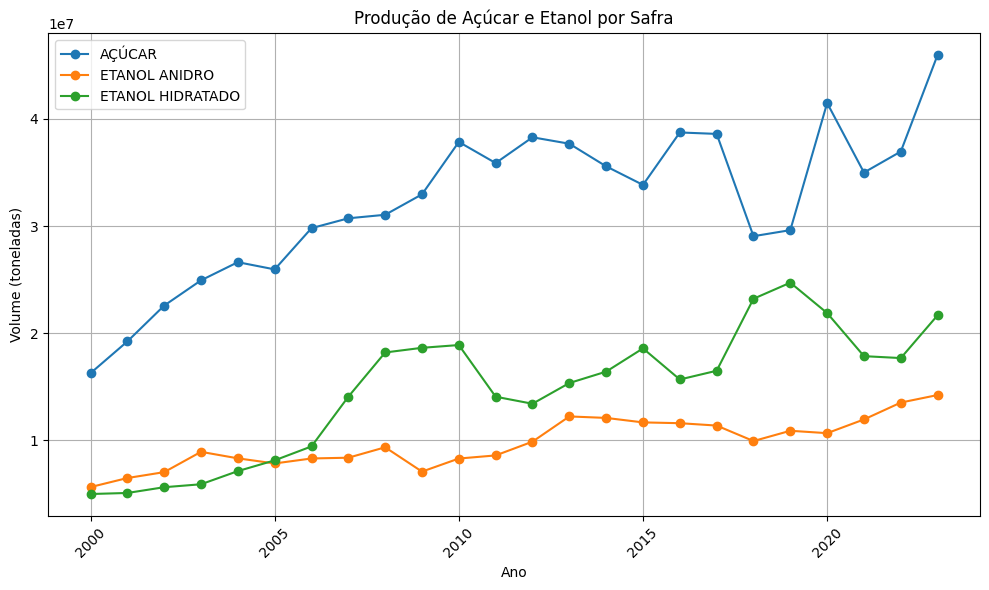

In [ ]:
producaoEtanol.set_index('Ano')[['AÇÚCAR', 'ETANOL ANIDRO', 'ETANOL HIDRATADO']].plot(kind='line', marker='o', figsize=(10,6))
plt.title('Produção de Açúcar e Etanol por Safra')
plt.ylabel('Volume (toneladas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_etanol_acucar = pd.merge(producaoEtanol, cotacao_media_acucar, on='Ano', how='inner')

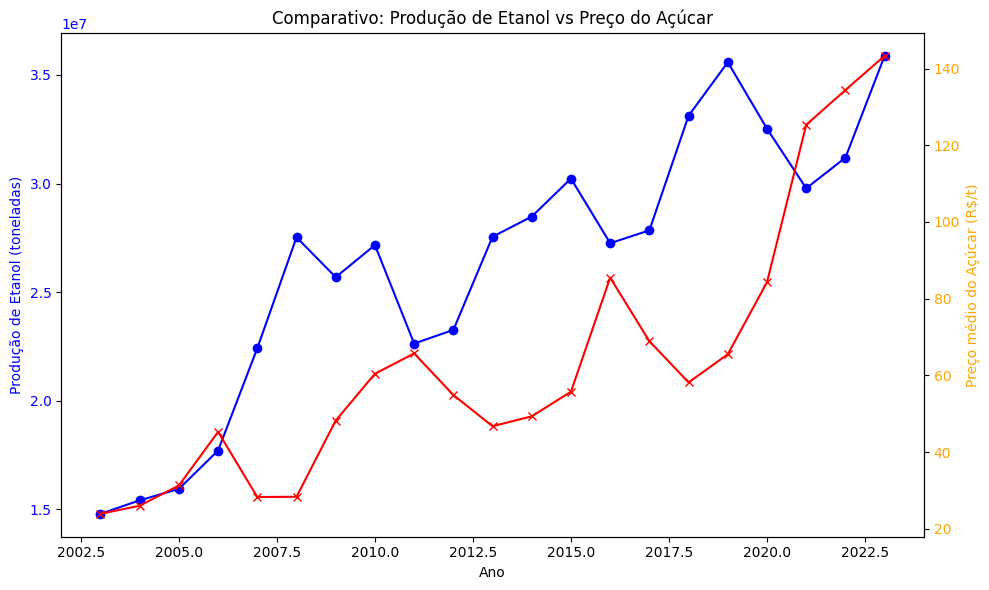

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Eixo Y da produção de etanol
ax1.plot(df_etanol_acucar['Ano'], df_etanol_acucar['ETANOL TOTAL'], color='blue', marker='o', label='Produção de Etanol')
ax1.set_ylabel('Produção de Etanol (toneladas)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eixo Y do preço do açúcar
ax2 = ax1.twinx()
ax2.plot(df_etanol_acucar['Ano'], df_etanol_acucar['Preço médio R$'], color='red', marker='x', label='Preço do Açúcar')
ax2.set_ylabel('Preço médio do Açúcar (R$/t)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Título e eixo X
plt.title('Comparativo: Produção de Etanol vs Preço do Açúcar')
ax1.set_xlabel('Ano')
fig.tight_layout()
plt.show()